# 8 Numerical Differentiation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.utilities.lambdify import lambdify

## Problem 1

In [3]:
def fun():
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    df = sy.diff(f, x)
    lam_f = lambdify(x, f, modules='numpy')
    lam_df = lambdify(x, df, modules='numpy')
    
    return lam_f, lam_df

In [4]:
lam_f, lam_df = fun()

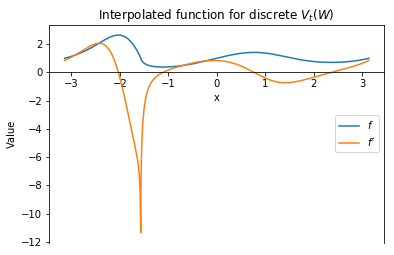

In [5]:
x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, lam_f(x), label='$f$')
plt.plot(x, lam_df(x), label="$f'$")
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.title('Interpolated function for discrete $V_t(W)$')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend(loc='center right')
plt.show()

## Problem 2

In [13]:
def forward_order1(f, x, h):
    num = f(x + h) - f(x)
    den = h
    return num / den

def forward_order2(f, x, h):
    num = -3 * f(x) + 4 * f(x + h) - f(x + 2 * h)
    den = 2 * h
    return num / den

def backward_order1(f, x, h):
    num = f(x) - f(x - h) 
    den = h
    return num / den

def backward_order2(f, x, h):
    num = 3 * f(x) - 4 * f(x - h) + f(x - 2 * h)
    den = 2 * h
    return num / den

def centered_order2(f, x, h):
    num = f(x + h) - f(x - h)
    den = 2 * h
    return num / den

def centered_order4(f, x, h):
    num = f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)
    den = 12 * h
    return num / den


In [14]:
def f(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))

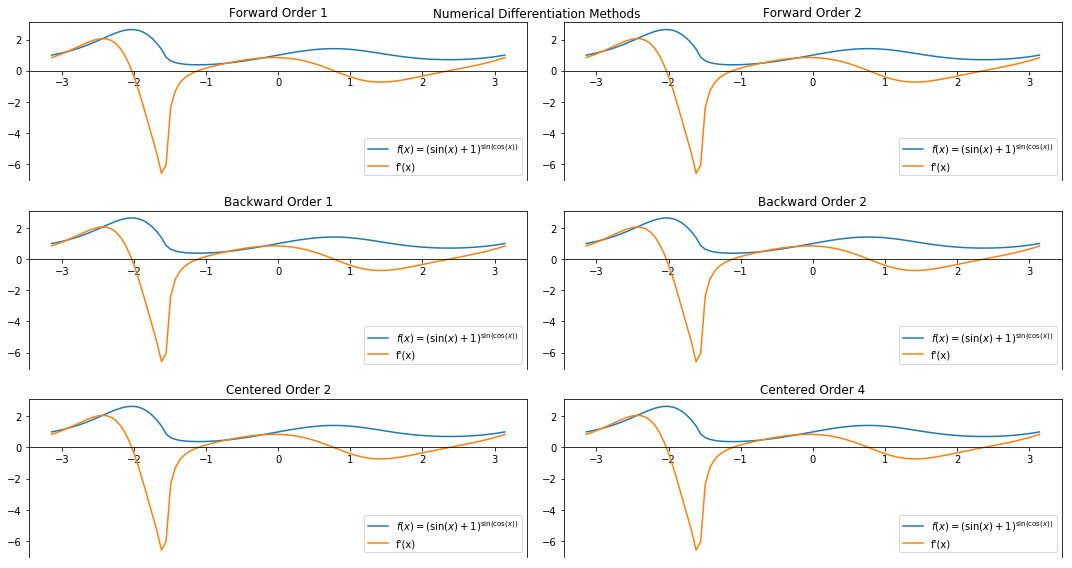

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15,8))
h = 1e-8
x = np.linspace(-np.pi, np.pi, 100)

def subplot(ax, f, df, h, label):
    ax.spines["bottom"].set_position("zero")
    ax.plot(x, f(x), label = r"$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$")
    ax.plot(x, df(f, x, h), label = r"f'(x)")
    ax.set_title(label)
    ax.legend()

subplot(axes[0,0], f, forward_order1, h, "Forward Order 1")
subplot(axes[0,1], f, forward_order2, h, "Forward Order 2")
subplot(axes[1,0], f, backward_order1, h, "Backward Order 1")
subplot(axes[1,1], f, backward_order2, h, "Backward Order 2")
subplot(axes[2,0], f, centered_order2, h, "Centered Order 2")
subplot(axes[2,1], f, centered_order4, h, "Centered Order 4")

plt.suptitle("Numerical Differentiation Methods")
plt.tight_layout()
plt.show()

In [22]:
np.linalg.norm(lam_df(x) - forward_order1(f, x, h))

1.5450456352179453e-06

In [23]:
np.linalg.norm(lam_df(x) - forward_order2(f, x, h))

1.6681173283370521e-06

In [25]:
np.linalg.norm(lam_df(x) - backward_order1(f, x, h))

1.388155626437787e-06

In [26]:
np.linalg.norm(lam_df(x) - backward_order2(f, x, h))

1.3009450220034599e-06

In [27]:
np.linalg.norm(lam_df(x) - centered_order2(f, x, h))

1.6492577421423753e-07

In [28]:
np.linalg.norm(lam_df(x) - centered_order4(f, x, h))

2.188955912700427e-07

## Problem 3

In [29]:
def error(f, df1, df2, h, x):
    return np.abs(df1(x) - df2(f, x, h))

In [39]:
def prob3(x):
    h = np.logspace(-8,0,10)
    
    fig = plt.figure(figsize=(10,7))
    
    plt.plot(h, error(f, lam_df, forward_order1, h, x), '-o', label = "Order 1 Forward")
    plt.plot(h, error(f, lam_df, forward_order2, h, x), '-o', label = "Order 2 Forward")
    plt.plot(h, error(f, lam_df, backward_order1, h, x), '-o', label = "Order 1 Backward")
    plt.plot(h, error(f, lam_df, backward_order2, h, x), '-o', label = "Order 2 Backward")
    plt.plot(h, error(f, lam_df, centered_order2, h, x), '-o', label = "Order 2 Centered")
    plt.plot(h, error(f, lam_df, centered_order4, h, x), '-o', label = "Order 4 Centered")
    plt.loglog()
    plt.legend(loc='upper left')
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.show()

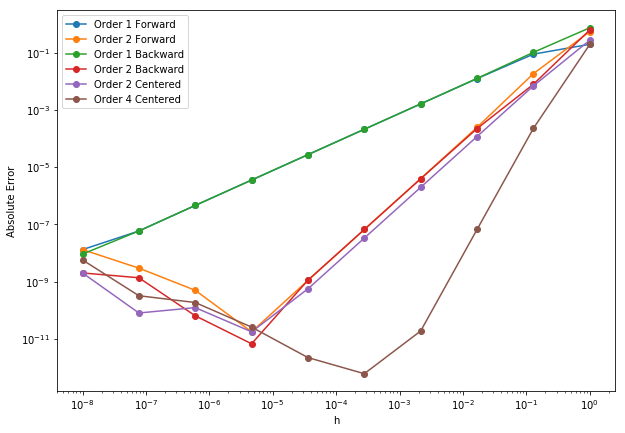

In [40]:
prob3(1)

## Problem 5

In [69]:
def prob5(f, x_0, h):
    n, m = len(x_0), len(f(x_0))
    J = np.zeros((m, n))
    for i in range(n):
        e = np.eye(n)[:, i]
        J[:, i] = (f(x_0 + h * e) - f(x_0 - h * e)) / (2 * h)
    return J

In [70]:
def f(x):
    return np.array([x[0] ** 2, x[0] ** 3 - x[1]]).T

In [71]:
prob5(f, np.array([5,5]), 1e-8)

array([[ 9.99999994,  0.        ],
       [74.99999981, -0.99999937]])

In [72]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sy.Matrix([f1,f2])  
F.jacobian([x,y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

In [73]:
F.jacobian([x,y]).subs([(x,5), (y,5)])

Matrix([
[10,  0],
[75, -1]])

## Problem 6

In [77]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [78]:
def T(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    
    return 2 * x * T(x, n - 1) - T(x, n - 2)

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


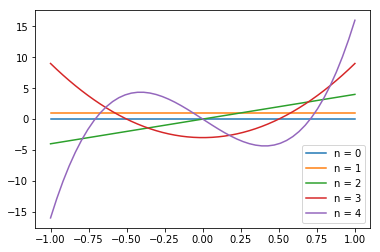

In [83]:
fun =  elementwise_grad(T)
x = anp.linspace(-1, 1)
for i in range(0, 5):
    plt.plot(x, fun(x, i), label=r"n = {}".format(i))
plt.legend()
plt.show()